In [1]:
import random, os, sys

from PIL import Image
import PIL

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.metrics import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.backend import clear_session
from tensorflow.keras import models
import pickle


from skimage import io, color, filters
from skimage.transform import resize

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')
plt.rcParams.update({'font.size': 20})

!pip install -q pyyaml h5py

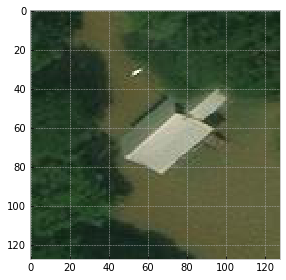

In [2]:
# taking a look at the first image in the damaged dataset

pic1 = 'data/archive/train_another/damage/-93.6141_30.754263.jpeg'

io.imshow(pic1);

In [3]:
# shape of pic1

pic1 = io.imread(pic1)

pic1.shape

(128, 128, 3)

So it's a 128x128 images with 3 color channels... this makes sense

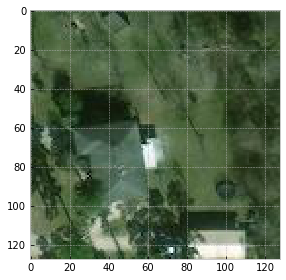

In [4]:
# taking a look at the first image from the no damage dataset

pic2 = 'data/archive/train_another/no_damage/-95.086_29.827665000000003.jpeg'

io.imshow(pic2);

Alright, so I'm actually able to read in images

In [5]:
# Sanity check

pic2 = io.imread(pic2)

pic2.shape

(128, 128, 3)

Same deal, it looks like the non damaged images are the same size and channels

Let's see if I can build a basic, crappy neural network

input layer has 64 filters, 7x7 kernel size, 

## First attempt at a model

In [6]:
# Run this ONLY if I want to clear the entire session from memory *****

clear_session()

In [7]:
# first shot at a CNN

def build_first_model():
    model = Sequential()

    model.add(Conv2D(16, 6, activation='relu',
                          padding='same'))

    model.add(MaxPooling2D(pool_size=2, strides=2))
              
    model.add(Conv2D(64, 3, activation='relu', padding='same'))
    model.add(Conv2D(64, 3, activation='relu', padding='same'))

    model.add(MaxPooling2D(pool_size=2, strides=2))
          
    model.add(Conv2D(128, 3, activation='relu', padding='same'))
    model.add(Conv2D(128, 3, activation='relu', padding='same'))
          
    model.add(MaxPooling2D(pool_size=2, strides=2))
          
    model.add(Flatten())
          
    model.add(Dense(64, activation='relu'))

    model.add(Dropout(0.1))

    model.add(Dense(32, activation='relu'))

    model.add(Dropout(0.1))

    model.add(Dense(1, activation='sigmoid'))
          
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=[BinaryCrossentropy(), 'accuracy'])
    
    return model

In [70]:
'''
Artifact of making randomly pulled images from dataset
'''

# # 100 random images from no damage training directory
# no_damage_dir = 'data/archive/train_another/no_damage'

# _100_no_damage = []

# for num in range(100):
#     _100_no_damage.append(io.imread(no_damage_dir + '/' + random.choice(os.listdir(no_damage_dir))))
    
# # 100 random images from damage training directory
# damage_dir = 'data/archive/train_another/damage'

# _100_damage = []

# for num in range(100):
#     _100_damage.append(io.imread(damage_dir + '/' + random.choice(os.listdir(damage_dir))))

# # 50 random images from damage test directory
# test_damage_dir = 'data/archive/test/damage'
    
# _50_damage_test = []

# for num in range(50):
#     _50_damage_test.append(io.imread(test_damage_dir + '/' + random.choice(os.listdir(test_damage_dir))))
    

# # 50 random images from no damage test directory
# test_no_damage_dir = 'data/archive/test/no_damage'
    
# _50_no_damage_test = []

# for num in range(50):
#     _50_no_damage_test.append(io.imread(test_no_damage_dir + '/' + random.choice(os.listdir(test_no_damage_dir))))


In [2]:
'''
Another artifact
'''

# # converting image lists to numpy arrays

# # train
# _100_no_damage = np.array(_100_no_damage)
# _100_damage = np.array(_100_damage)

# train = np.concatenate((_100_no_damage, _100_damage))


# # test
# _50_no_damage_test = np.array(_50_no_damage_test)
# _50_damage_test = np.array(_50_damage_test)

# test = np.concatenate((_50_no_damage_test, _50_damage_test));

'\nAnother artifact\n\n'

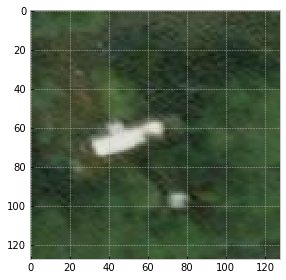

In [9]:
io.imshow(_100_damage[0]);

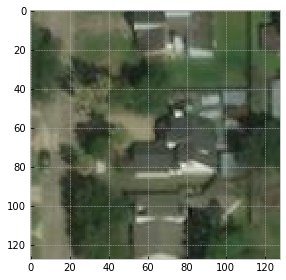

In [10]:
io.imshow(_100_no_damage[0]);

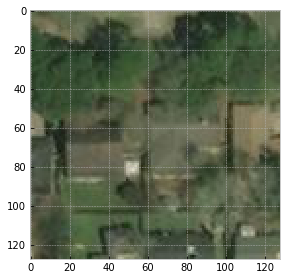

In [11]:
io.imshow(_50_no_damage_test[0]);

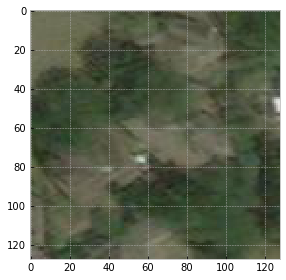

In [12]:
io.imshow(_50_damage_test[0]);

In [38]:
# first_model = build_first_model()

# model.summary()

In [8]:
first_model = build_first_model()

batch_size=32

train_datagen = ImageDataGenerator(rescale=1./255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) # no transformations for test

train_generator = train_datagen.flow_from_directory('data/archive/train_another', batch_size=batch_size,
                                    shuffle=True, class_mode='binary', target_size=(128, 128))

validation_generator = test_datagen.flow_from_directory('data/archive/test', batch_size=batch_size,
                                         shuffle=True, class_mode='binary', target_size=(128, 128))


history = first_model.fit(train_generator, epochs=50,
                         validation_data=validation_generator)

score = first_model.evaluate(validation_generator, verbose=0) 

print('Test score:', score[0])
print('Test accuracy:', score[1])

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/50
313/313 [==============================] - 38s 117ms/step - loss: 0.6963 - binary_crossentropy: 0.6963 - accuracy: 0.5327 - val_loss: 0.6935 - val_binary_crossentropy: 0.6935 - val_accuracy: 0.5000
Epoch 2/50
313/313 [==============================] - 34s 107ms/step - loss: 0.6933 - binary_crossentropy: 0.6933 - accuracy: 0.4979 - val_loss: 0.6932 - val_binary_crossentropy: 0.6932 - val_accuracy: 0.5000
Epoch 3/50
313/313 [==============================] - 33s 107ms/step - loss: 0.6929 - binary_crossentropy: 0.6929 - accuracy: 0.5077 - val_loss: 0.6931 - val_binary_crossentropy: 0.6931 - val_accuracy: 0.5000
Epoch 4/50
313/313 [==============================] - 33s 106ms/step - loss: 0.6932 - binary_crossentropy: 0.6932 - accuracy: 0.4937 - val_loss: 0.6931 - val_binary_crossentropy: 0.6931 - val_accuracy: 0.5000
Epoch 5/50
313/313 [==============================] - 33s 106ms/step - loss: 0.

Epoch 40/50
313/313 [==============================] - 33s 106ms/step - loss: 0.6931 - binary_crossentropy: 0.6931 - accuracy: 0.5092 - val_loss: 0.6932 - val_binary_crossentropy: 0.6932 - val_accuracy: 0.5000
Epoch 41/50
313/313 [==============================] - 33s 106ms/step - loss: 0.6931 - binary_crossentropy: 0.6931 - accuracy: 0.5062 - val_loss: 0.6932 - val_binary_crossentropy: 0.6932 - val_accuracy: 0.5000
Epoch 42/50
313/313 [==============================] - 33s 107ms/step - loss: 0.6932 - binary_crossentropy: 0.6932 - accuracy: 0.4981 - val_loss: 0.6931 - val_binary_crossentropy: 0.6931 - val_accuracy: 0.5000
Epoch 43/50
313/313 [==============================] - 33s 106ms/step - loss: 0.6931 - binary_crossentropy: 0.6931 - accuracy: 0.5056 - val_loss: 0.6932 - val_binary_crossentropy: 0.6932 - val_accuracy: 0.5000
Epoch 44/50
313/313 [==============================] - 33s 106ms/step - loss: 0.6932 - binary_crossentropy: 0.6932 - accuracy: 0.5037 - val_loss: 0.6932 - val_b

In [9]:
first_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, None, None)    1744      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, None, None)    0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, None, None)    9280      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, None, None)    36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, None, None)    0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, None, None)   73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, None, None)   1

In [10]:
history.history

{'loss': [0.6932223439216614,
  0.6934311389923096,
  0.6927871704101562,
  0.6933192610740662,
  0.6931734085083008,
  0.6932142376899719,
  0.6933116912841797,
  0.6931793093681335,
  0.6932293176651001,
  0.693424642086029,
  0.6932324171066284,
  0.6932624578475952,
  0.6932212710380554,
  0.6931546330451965,
  0.6932499408721924,
  0.6932579278945923,
  0.6931520700454712,
  0.6932345032691956,
  0.6932458281517029,
  0.6932752728462219,
  0.6932584643363953,
  0.6932362914085388,
  0.69319748878479,
  0.6931764483451843,
  0.693230152130127,
  0.6932196617126465,
  0.6932132840156555,
  0.6932074427604675,
  0.6932757496833801,
  0.6932152509689331,
  0.6932094693183899,
  0.6932349801063538,
  0.6932061314582825,
  0.6931585669517517,
  0.6932367086410522,
  0.6931982040405273,
  0.6932128071784973,
  0.6932138800621033,
  0.6931595802307129,
  0.6931595206260681,
  0.6931477785110474,
  0.693183958530426,
  0.6931886672973633,
  0.6932197213172913,
  0.6932082772254944,
  0.693

In [11]:
# saving model

first_model.save('first_model.h5')

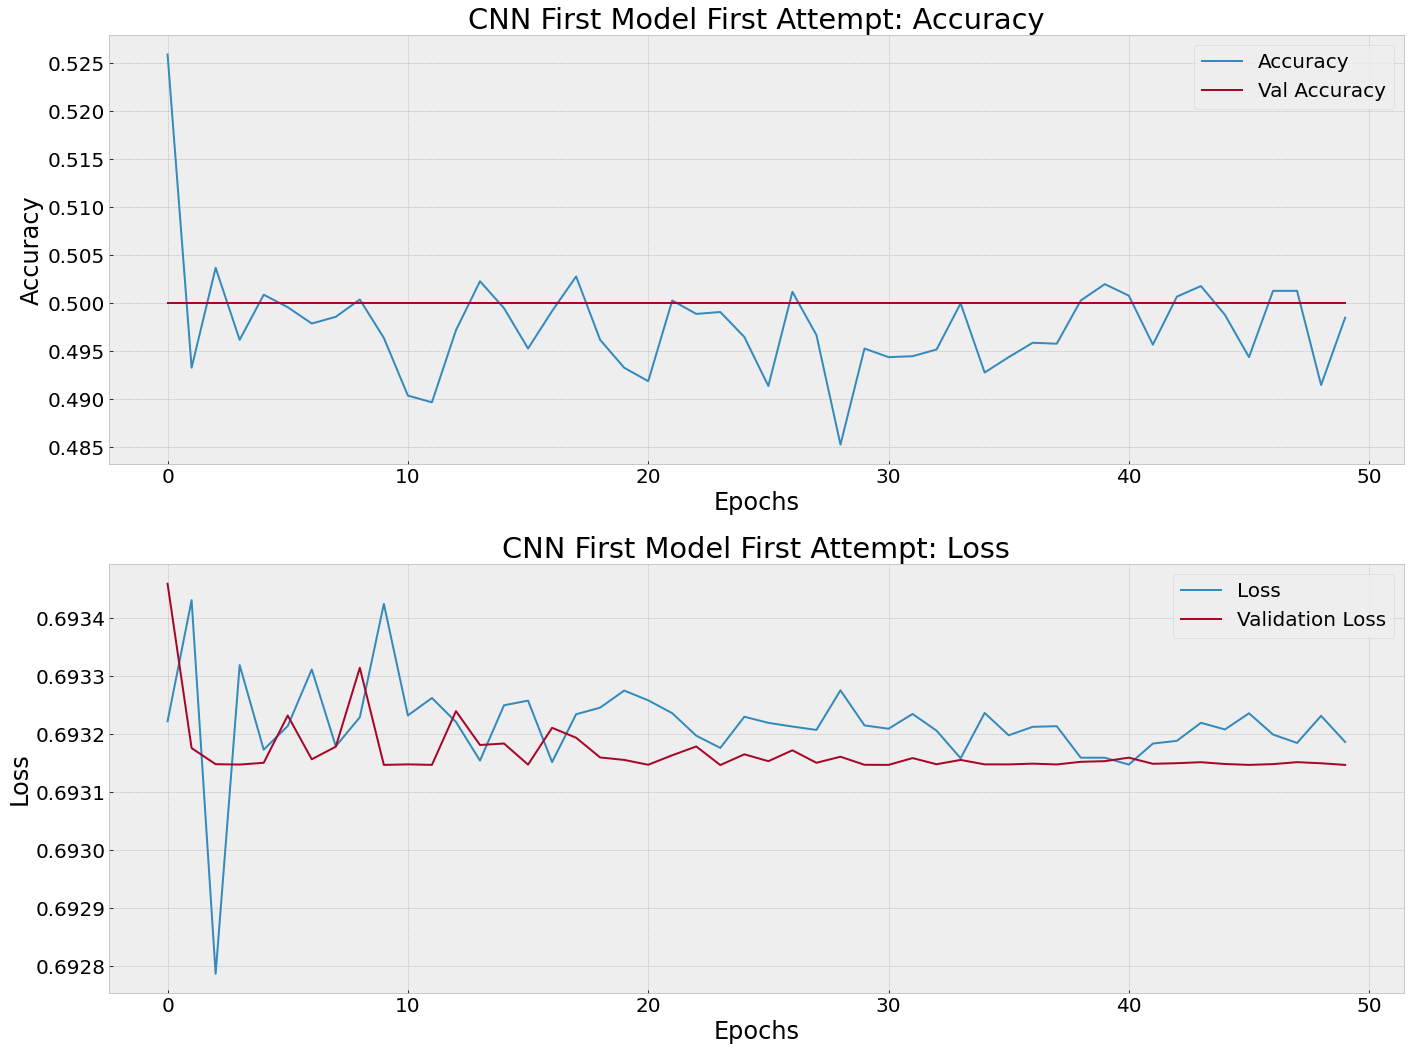

In [73]:
fig, ax = plt.subplots(2, 1, figsize=(20,15))

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

ax[0].plot(accuracy, label='Accuracy')
ax[0].plot(val_accuracy, label='Val Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_title('CNN First Model First Attempt: Accuracy')
ax[0].legend()

ax[1].plot(loss, label='Loss')
ax[1].plot(val_loss, label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('CNN First Model First Attempt: Loss')
ax[1].legend()
plt.tight_layout();

In [74]:
'''Additional plotting code for first model'''

# fig, ax = plt.subplots(figsize=(12,8))


# ax.plot(loss, label='Loss')
# ax.plot(val_loss, label='Validation Loss')
# ax.set_xlabel('Epochs')
# ax.set_ylabel('Loss')
# ax.set_title('CNN First Model First Attempt: Loss')
# ax.legend();

'Additional plotting code for first model'

We can see the model above doesn't perform well at all. It's essentially just random guessting with an accuracy score of .5 across the board

## Building Out and Training AlexNet

In [14]:
# Run this ONLY if I want to clear the entire session from memory *****

clear_session()

In [15]:
def build_alexnet():
    model = Sequential()
    
    model.add(Conv2D(96, (11,11), strides=(4,4), activation='relu', 
                     padding='VALID'))
    
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='VALID',
                          input_shape=(27,27,1)))
    
    model.add(Conv2D(256, (5,5), strides=(1,1), activation='relu',
                    padding='SAME', input_shape=(27,27)))
    
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='VALID',
                           input_shape=(13,13)))
    
    model.add(Conv2D(384, (3,3), input_shape=(13,13), strides=(1,1),
                     activation='relu', padding='SAME'))
    
    model.add(Conv2D(384, (3,3), input_shape=(13,13), strides=(1,1), activation='relu',
                    padding='SAME'))
    
    model.add(Conv2D(256, (3,3), input_shape=(13,13), strides=(1,1), activation='relu',
                    padding='SAME'))
    
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='VALID'))
    
    model.add(Flatten())
    
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.1))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', 
                  optimizer=Adam(lr=0.0001), 
                  metrics=[BinaryCrossentropy(), 'accuracy'])
    
    return model

In [16]:
alexnet = build_alexnet()

batch_size=32
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.025, patience=25)

train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

# train_datagen = ImageDataGenerator(rescale=1./255,
#                             shear_range=0.2,
#                             zoom_range=0.2,
#                             horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) # no transformations for test

train_generator = train_datagen.flow_from_directory('data/archive/train_another', batch_size=batch_size,
                                    shuffle=True, class_mode='binary', target_size=(224,224)) #128,128

validation_generator = test_datagen.flow_from_directory('data/archive/validation_another', batch_size=batch_size,
                                         shuffle=True, class_mode='binary', target_size=(224,224)) #128,128


hist1 = alexnet.fit(train_generator, epochs=200,
                         validation_data=validation_generator, callbacks=[es])

score = alexnet.evaluate(validation_generator, verbose=0)

print('Loss:',score[1])
print('Validation Accuracy:',score[2])

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/200
313/313 [==============================] - 18s 54ms/step - loss: 0.5537 - binary_crossentropy: 0.5537 - accuracy: 0.6929 - val_loss: 0.2911 - val_binary_crossentropy: 0.2911 - val_accuracy: 0.8920
Epoch 2/200
313/313 [==============================] - 15s 46ms/step - loss: 0.2773 - binary_crossentropy: 0.2773 - accuracy: 0.8961 - val_loss: 0.2292 - val_binary_crossentropy: 0.2292 - val_accuracy: 0.9060
Epoch 3/200
313/313 [==============================] - 14s 46ms/step - loss: 0.2379 - binary_crossentropy: 0.2379 - accuracy: 0.9056 - val_loss: 0.2222 - val_binary_crossentropy: 0.2222 - val_accuracy: 0.9055
Epoch 4/200
313/313 [==============================] - 14s 45ms/step - loss: 0.2200 - binary_crossentropy: 0.2200 - accuracy: 0.9125 - val_loss: 0.1613 - val_binary_crossentropy: 0.1613 - val_accuracy: 0.9325
Epoch 5/200
313/313 [==============================] - 14s 45ms/step - loss: 0.

Epoch 40/200
313/313 [==============================] - 14s 45ms/step - loss: 0.0096 - binary_crossentropy: 0.0096 - accuracy: 0.9968 - val_loss: 0.1776 - val_binary_crossentropy: 0.1776 - val_accuracy: 0.9550
Epoch 41/200
313/313 [==============================] - 14s 45ms/step - loss: 0.0046 - binary_crossentropy: 0.0046 - accuracy: 0.9987 - val_loss: 0.2009 - val_binary_crossentropy: 0.2009 - val_accuracy: 0.9515
Epoch 42/200
313/313 [==============================] - 14s 45ms/step - loss: 0.0254 - binary_crossentropy: 0.0254 - accuracy: 0.9907 - val_loss: 0.2304 - val_binary_crossentropy: 0.2304 - val_accuracy: 0.9505
Epoch 43/200
313/313 [==============================] - 14s 46ms/step - loss: 0.0216 - binary_crossentropy: 0.0216 - accuracy: 0.9934 - val_loss: 0.2006 - val_binary_crossentropy: 0.2006 - val_accuracy: 0.9600
Epoch 44/200
313/313 [==============================] - 14s 46ms/step - loss: 0.0109 - binary_crossentropy: 0.0109 - accuracy: 0.9966 - val_loss: 0.2132 - val_b

In [17]:
alexnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, None, None)    34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 96, None, None)    0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, None, None)   614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, None, None)   0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 384, None, None)   885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 384, None, None)   1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 256, None, None)   8

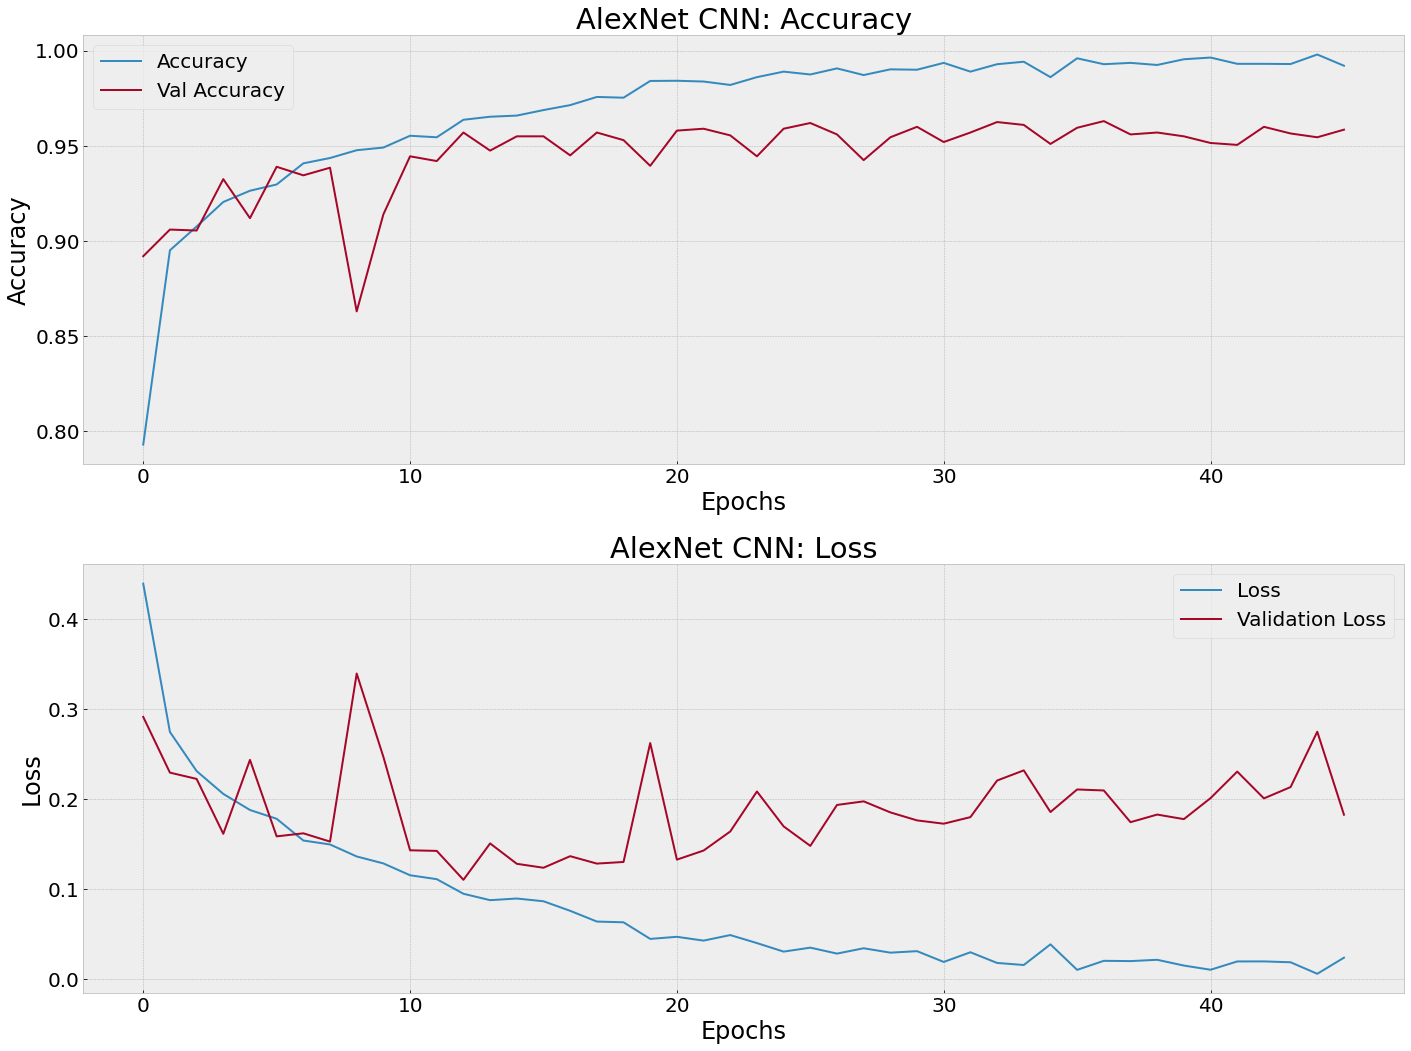

In [67]:
fig, ax = plt.subplots(2, 1, figsize=(20,15))

accuracy = hist1.history['accuracy']
val_accuracy = hist1.history['val_accuracy']

loss = hist1.history['loss']
val_loss = hist1.history['val_loss']

ax[0].plot(accuracy, label='Accuracy')
ax[0].plot(val_accuracy, label='Val Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_title('AlexNet CNN: Accuracy')
ax[0].legend();


ax[1].plot(loss, label='Loss')
ax[1].plot(val_loss, label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('AlexNet CNN: Loss')
ax[1].legend()

plt.tight_layout();

In [69]:
'''additional plotting code for AlexNet Loss function'''

# fig, ax = plt.subplots(figsize=(12,8))


# ax.plot(loss, label='Loss')
# ax.plot(val_loss, label='Validation Loss')
# ax.set_xlabel('Epochs')
# ax.set_ylabel('Loss')
# ax.set_title('AlexNet CNN: Loss')
# ax.legend();

'additional plotting code for AlexNet Loss function'

**This model is definitely doing way better... let's save it so we can use it later to make predictions

In [20]:
alexnet.save('alexnet.h5')

In [2]:
alexnet = models.load_model('alexnet.h5')

ValueError: The channel dimension of the inputs should be defined. Found `None`.

In [3]:
'''
Let's see if we can get some accurate predictions
'''


predict_datagen = ImageDataGenerator() # rescale=1./255

prediction_generator = predict_datagen.flow_from_directory('data/archive/test', batch_size=1,
                                         shuffle=True, class_mode='binary', target_size=(224,224), color_mode='rgb')

Found 2000 images belonging to 2 classes.


In [4]:
image, label = next(prediction_generator)

In [5]:
# image.reshape(224, 224, 3)

In [6]:
image[0].shape

(224, 224, 3)

In [7]:
def predict_and_display(x):
    io.imshow(x[0].reshape(224,224,3))
    return (alexnet.predict(x) > 0.5).astype("int32");

/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


NameError: name 'alexnet' is not defined

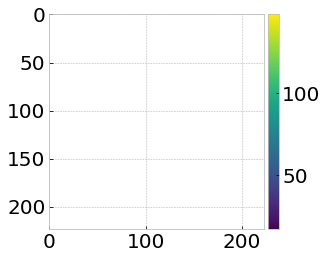

In [8]:
predict_and_display(image), label

In [133]:
prediction[0][0]

0.9993975

In [134]:
sigmoid(prediction[0][0])

0.7309401223233916

TypeError: Invalid shape (1, 3, 224, 224) for image data

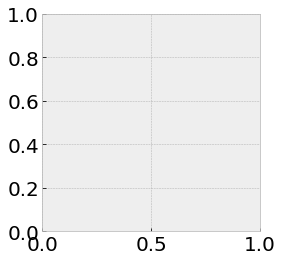

In [128]:
plt.imshow(np.array(image))

## Building ResNet

In [31]:
# Run this ONLY if I want to clear the entire session from memory *****

clear_session()

In [32]:
# Attempting to build resnet-34
# first need a ResidualUnit Layer

class ResidualUnit(keras.layers.Layer):
    
    def __init__(self, filters, strides=1, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            Conv2D(filters, 3, strides=strides,
                               padding='SAME', use_bias=False),
            BatchNormalization(),
            self.activation,
            Conv2D(filters, 3, strides=1,
                               padding='SAME', use_bias=False),
            BatchNormalization()]
        
        self.skip_layers = []
        
        if strides > 1:
            self.skip_layers = [
                Conv2D(filters, 1, strides=strides,
                                   padding='SAME', use_bias=False),
                BatchNormalization()]
            
    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)
    
    def get_config(self):
        return {"units": self.units}

In [33]:
def build_resnet():
    model = Sequential()
    
    model.add(Conv2D(64, 7, strides=2, padding='SAME', use_bias=False))
    
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=3, strides=2, padding='SAME'))
    
    prev_filters = 64
    
    for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
        strides = 1 if filters == prev_filters else 2
        model.add(ResidualUnit(filters, strides=strides))
        prev_filters=filters
   
    model.add(keras.layers.GlobalAvgPool2D())
    model.add(Flatten())
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=[BinaryCrossentropy(), 'accuracy']) # Adam(lr=0.0001)
    
    return model

In [34]:
resnet = build_resnet()

batch_size=32
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.025, patience=50)

train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

# train_datagen = ImageDataGenerator(rescale=1./255,
#                             shear_range=0.2,
#                             zoom_range=0.2,
#                             horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) # no transformations for test

train_generator = train_datagen.flow_from_directory('data/archive/train_another', batch_size=batch_size,
                                    shuffle=True, class_mode='binary', target_size=(224,224)) #128,128

validation_generator = test_datagen.flow_from_directory('data/archive/validation_another', batch_size=batch_size,
                                         shuffle=True, class_mode='binary', target_size=(224,224)) #128,128


hist2 = resnet.fit(train_generator, epochs=200,
                         validation_data=validation_generator, callbacks=[es])

score = resnet.evaluate(validation_generator, verbose=0)

print('Loss:',score[1])
print('Validation Accuracy:',score[2])

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/200
313/313 [==============================] - 62s 189ms/step - loss: 0.9781 - binary_crossentropy: 0.9781 - accuracy: 0.6612 - val_loss: 0.3529 - val_binary_crossentropy: 0.3529 - val_accuracy: 0.8550
Epoch 2/200
313/313 [==============================] - 61s 194ms/step - loss: 0.3065 - binary_crossentropy: 0.3065 - accuracy: 0.8830 - val_loss: 11.3708 - val_binary_crossentropy: 11.3708 - val_accuracy: 0.5075
Epoch 3/200
313/313 [==============================] - 62s 198ms/step - loss: 0.2683 - binary_crossentropy: 0.2683 - accuracy: 0.9017 - val_loss: 13.5281 - val_binary_crossentropy: 13.5281 - val_accuracy: 0.5035
Epoch 4/200
313/313 [==============================] - 63s 202ms/step - loss: 0.2644 - binary_crossentropy: 0.2644 - accuracy: 0.8984 - val_loss: 0.2543 - val_binary_crossentropy: 0.2543 - val_accuracy: 0.9025
Epoch 5/200
313/313 [==============================] - 64s 204ms/step -

In [35]:
resnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, None, None)    9408      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, None, 112)     448       
_________________________________________________________________
activation (Activation)      (None, 64, None, 112)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, None, 56)      0         
_________________________________________________________________
residual_unit (ResidualUnit) (None, 64, None, 56)      74176     
_________________________________________________________________
residual_unit_1 (ResidualUni (None, 64, None, 56)      74176     
_________________________________________________________________
residual_unit_2 (ResidualUni (None, 64, None, 56)      7

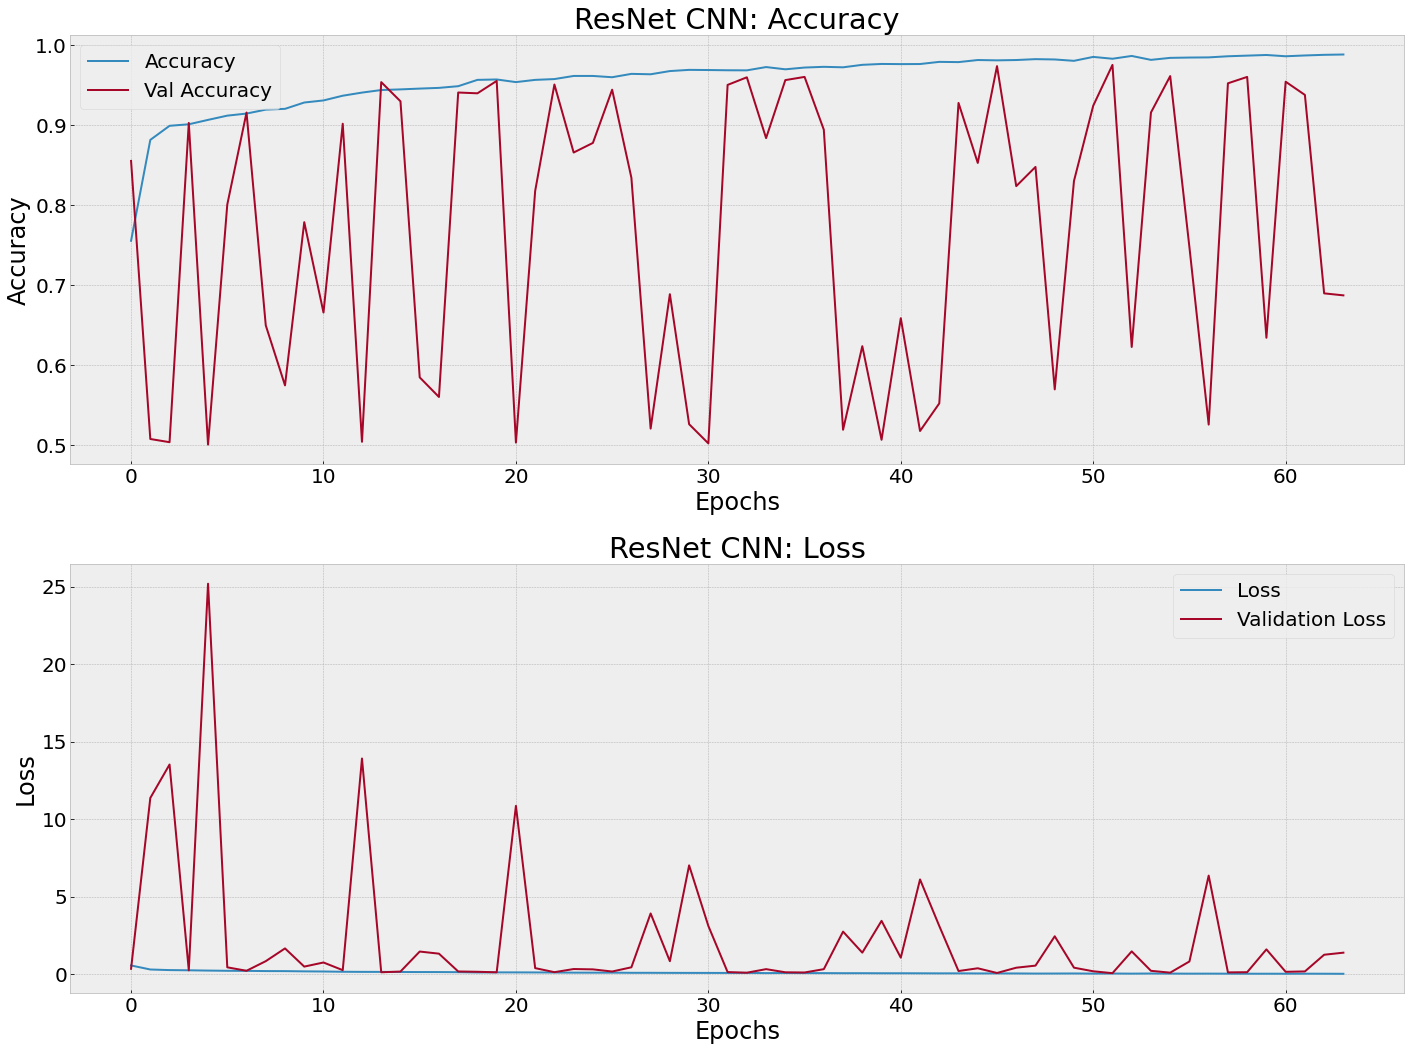

In [70]:
fig, ax = plt.subplots(2, 1, figsize=(20,15))

accuracy = hist2.history['accuracy']
val_accuracy = hist2.history['val_accuracy']

loss = hist2.history['loss']
val_loss = hist2.history['val_loss']

ax[0].plot(accuracy, label='Accuracy')
ax[0].plot(val_accuracy, label='Val Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_title('ResNet CNN: Accuracy')
ax[0].legend()

ax[1].plot(loss, label='Loss')
ax[1].plot(val_loss, label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('ResNet CNN: Loss')
ax[1].legend()
plt.tight_layout();

In [58]:
# fig, ax = plt.subplots(figsize=(12,8))


# ax.plot(loss, label='Loss')
# ax.plot(val_loss, label='Validation Loss')
# ax.set_xlabel('Epochs')
# ax.set_ylabel('Loss')
# ax.set_title('ResNet CNN: Loss')
# ax.legend();

These results are very interesting. It looks like both validation loss and accuracy are boucing all over the place. It may be worth adjusting the learning rate of the optimizer to see if there's a difference in performance

In [59]:
# resnet.save('resnet.h5')

Having some issues with saving this model. Check back on this later

## Resnet with a smaller learning rate (0.0001)

In [42]:
# Run this ONLY if I want to clear the entire session from memory *****

clear_session()

In [43]:
class ResidualUnit(keras.layers.Layer):
    
    def __init__(self, filters, strides=1, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            Conv2D(filters, 3, strides=strides,
                               padding='SAME', use_bias=False),
            BatchNormalization(),
            self.activation,
            Conv2D(filters, 3, strides=1,
                               padding='SAME', use_bias=False),
            BatchNormalization()]
        
        self.skip_layers = []
        
        if strides > 1:
            self.skip_layers = [
                Conv2D(filters, 1, strides=strides,
                                   padding='SAME', use_bias=False),
                BatchNormalization()]
            
    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [44]:
def build_resnet():
    model = Sequential()
    
    model.add(Conv2D(64, 7, strides=2, padding='SAME', use_bias=False))
    
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=3, strides=2, padding='SAME'))
    
    prev_filters = 64
    
    for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
        strides = 1 if filters == prev_filters else 2
        model.add(ResidualUnit(filters, strides=strides))
        prev_filters=filters
   
    model.add(keras.layers.GlobalAvgPool2D())
    model.add(Flatten())
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', 
                  optimizer=Adam(lr=0.0001), 
                  metrics=[BinaryCrossentropy(), 'accuracy'])
    
    return model

In [45]:
resnet2 = build_resnet()

batch_size=32
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.025, patience=50)

train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

# train_datagen = ImageDataGenerator(rescale=1./255,
#                             shear_range=0.2,
#                             zoom_range=0.2,
#                             horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) # no transformations for test

train_generator = train_datagen.flow_from_directory('data/archive/train_another', batch_size=batch_size,
                                    shuffle=True, class_mode='binary', target_size=(224,224)) #128,128

validation_generator = test_datagen.flow_from_directory('data/archive/validation_another', batch_size=batch_size,
                                         shuffle=True, class_mode='binary', target_size=(224,224)) #128,128


hist3 = resnet.fit(train_generator, epochs=200,
                         validation_data=validation_generator, callbacks=[es])

score = resnet.evaluate(validation_generator, verbose=0)

print('Loss:',score[1])
print('Validation Accuracy:',score[2])

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/200
313/313 [==============================] - 60s 192ms/step - loss: 0.0310 - binary_crossentropy: 0.0310 - accuracy: 0.9889 - val_loss: 6.6227 - val_binary_crossentropy: 6.6227 - val_accuracy: 0.5485
Epoch 2/200
313/313 [==============================] - 62s 198ms/step - loss: 0.0290 - binary_crossentropy: 0.0290 - accuracy: 0.9886 - val_loss: 0.1155 - val_binary_crossentropy: 0.1155 - val_accuracy: 0.9600
Epoch 3/200
313/313 [==============================] - 63s 201ms/step - loss: 0.0308 - binary_crossentropy: 0.0308 - accuracy: 0.9888 - val_loss: 2.1828 - val_binary_crossentropy: 2.1828 - val_accuracy: 0.5795
Epoch 4/200
313/313 [==============================] - 64s 206ms/step - loss: 0.0363 - binary_crossentropy: 0.0363 - accuracy: 0.9864 - val_loss: 0.1079 - val_binary_crossentropy: 0.1079 - val_accuracy: 0.9715
Epoch 5/200
313/313 [==============================] - 65s 208ms/step - los

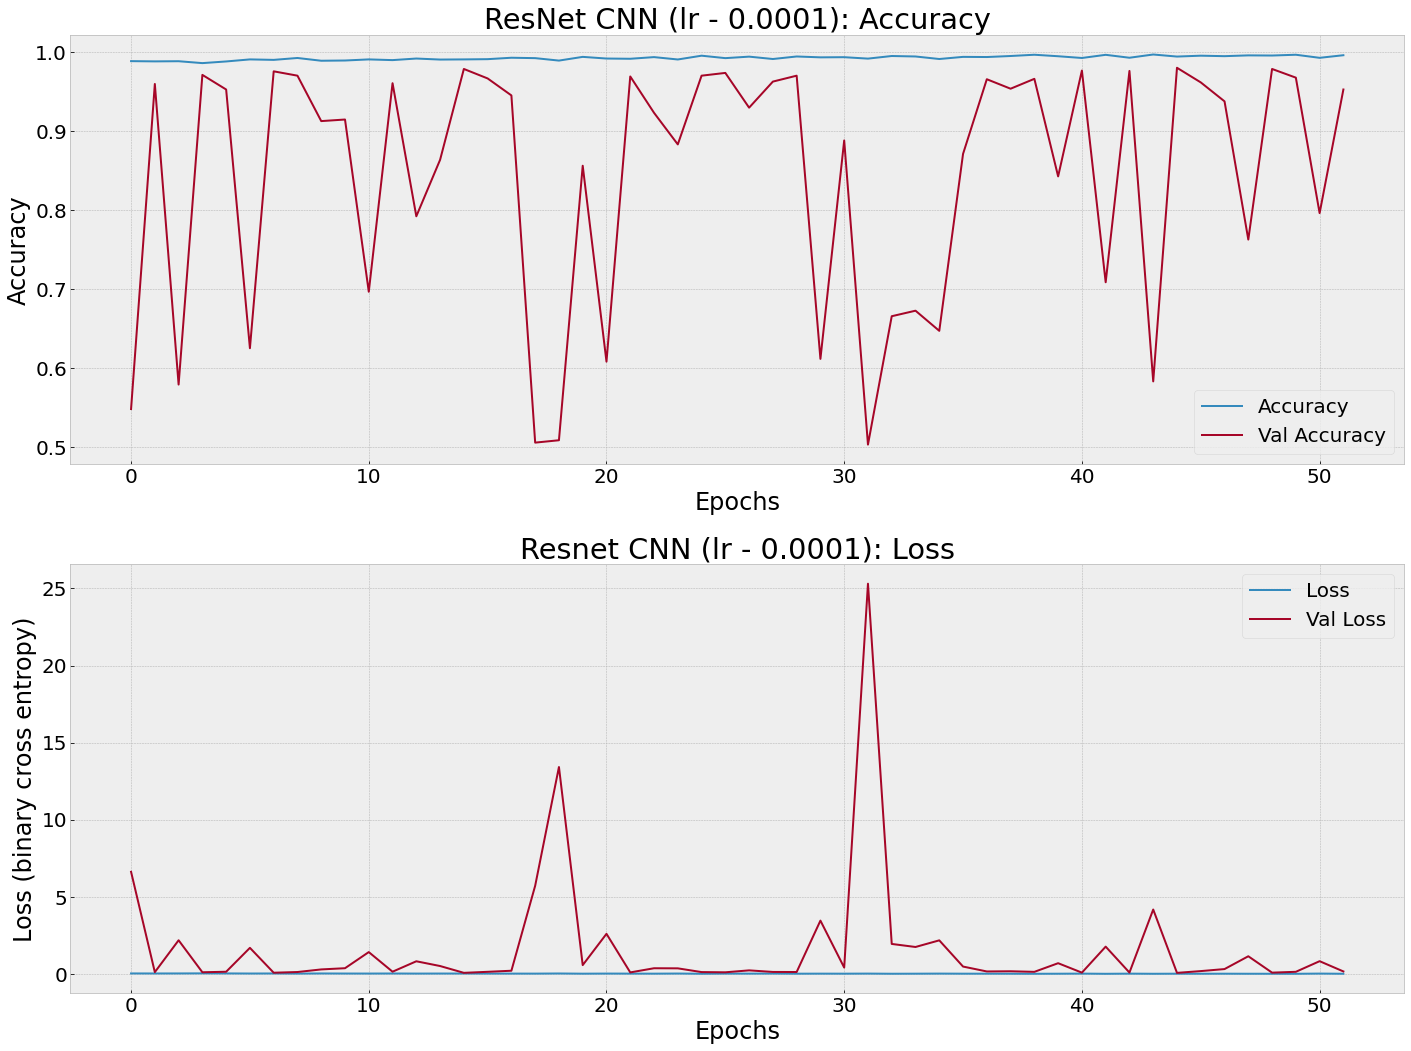

In [71]:
fig, ax = plt.subplots(2,1, figsize=(20,15))

accuracy = hist3.history['accuracy']
val_accuracy = hist3.history['val_accuracy']

loss = hist3.history['loss']
val_loss = hist3.history['val_loss']

ax[0].plot(accuracy, label='Accuracy')
ax[0].plot(val_accuracy, label='Val Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_title('ResNet CNN (lr - 0.0001): Accuracy')
ax[0].legend()

ax[1].plot(loss, label='Loss')
ax[1].plot(val_loss, label='Val Loss')
ax[1].set_ylabel('Loss (binary cross entropy)')
ax[1].set_xlabel('Epochs')
ax[1].set_title('Resnet CNN (lr - 0.0001): Loss')
ax[1].legend()
plt.tight_layout();

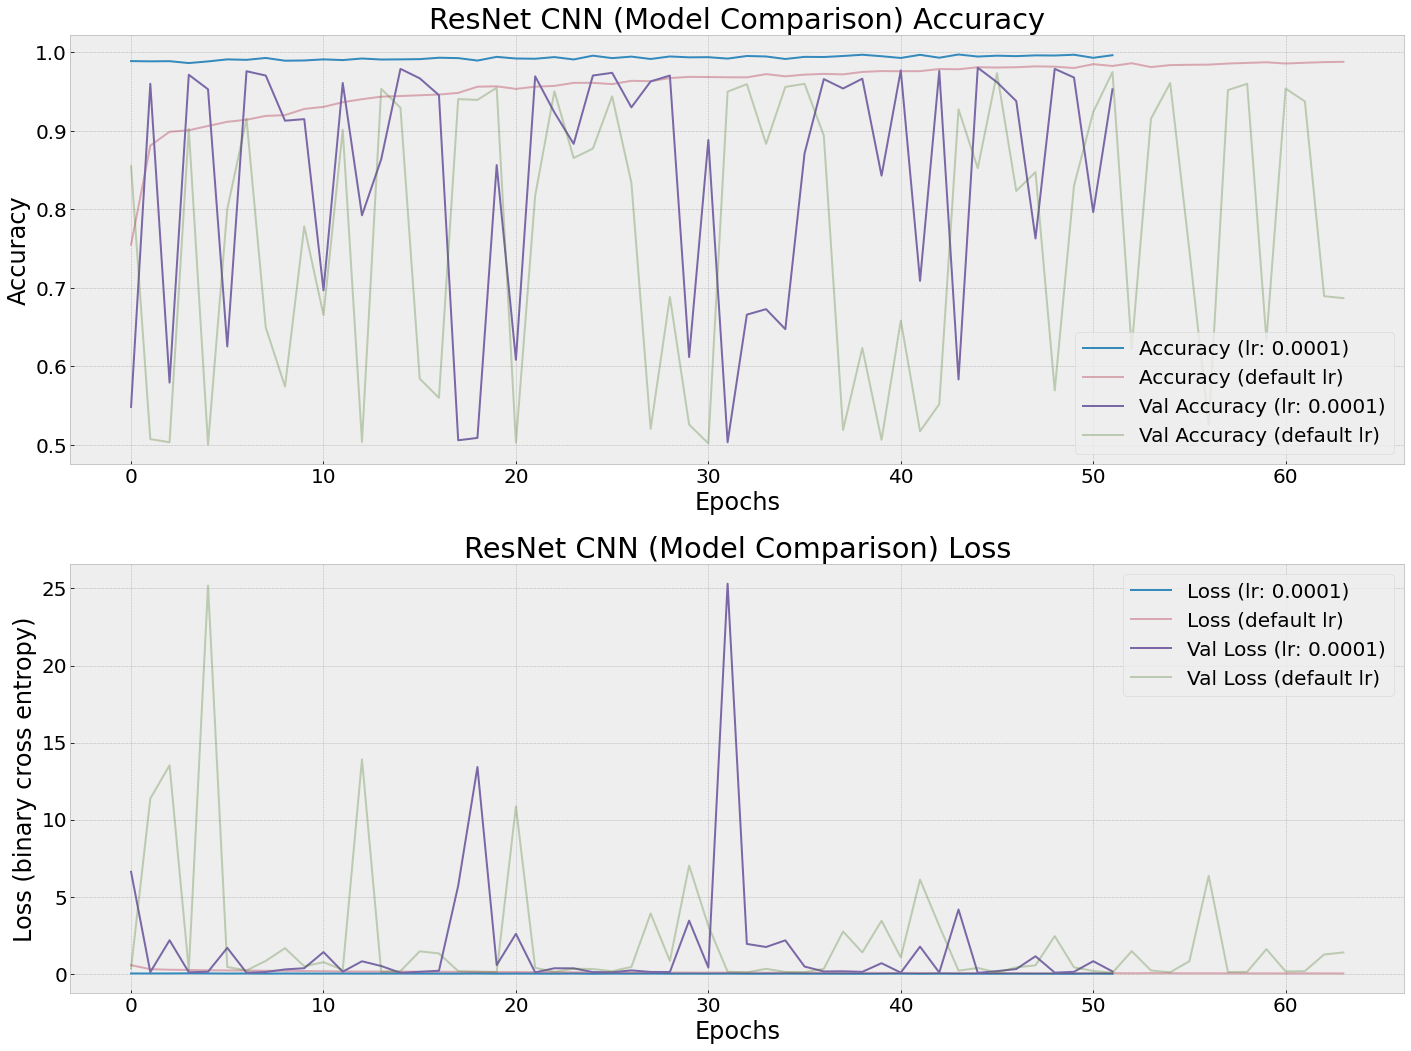

In [72]:
# lr set to 0.0001
accuracy = hist3.history['accuracy']
val_accuracy = hist3.history['val_accuracy']

loss = hist3.history['loss']
val_loss = hist3.history['val_loss']

# first model
loss1 = hist2.history['loss']
val_loss1 = hist2.history['val_loss']

accuracy1 = hist2.history['accuracy']
val_accuracy1 = hist2.history['val_accuracy']

# building plot
fig, ax = plt.subplots(2,1, figsize=(20,15))

ax[0].plot(accuracy, label='Accuracy (lr: 0.0001)')
ax[0].plot(accuracy1, label='Accuracy (default lr)', alpha=0.3)
ax[0].plot(val_accuracy, label='Val Accuracy (lr: 0.0001)')
ax[0].plot(val_accuracy1, label='Val Accuracy (default lr)', alpha=0.3)
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_title('ResNet CNN (Model Comparison) Accuracy')
ax[0].legend()

ax[1].plot(loss, label='Loss (lr: 0.0001)')
ax[1].plot(loss1, label='Loss (default lr)', alpha=0.3)
ax[1].plot(val_loss, label='Val Loss (lr: 0.0001)')
ax[1].plot(val_loss1, label='Val Loss (default lr)', alpha=0.3)
ax[1].set_ylabel('Loss (binary cross entropy)')
ax[1].set_xlabel('Epochs')
ax[1].set_title('ResNet CNN (Model Comparison) Loss')
ax[1].legend()
plt.tight_layout();

it doesn't look like one model is better than the other, and it definitely looks like it's overfitting.